In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## Load Data

In [2]:
# Load the data
fire_data = pd.read_csv('input_data/processed/fire_data.csv')
cell_static_data = pd.read_csv('input_data/processed/cell_static.csv')
cell_dynamic_data = pd.read_csv('input_data/processed/cell_dynamic.csv')

## Preprocess Data

In [3]:
fire_data['ACQ_DATE'] = pd.to_datetime(fire_data['ACQ_DATE'])
cell_dynamic_data['ACQ_DATE'] = pd.to_datetime(cell_dynamic_data['ACQ_DATE'])

In [4]:
# Save the fire ids
fire_ids = pd.DataFrame(fire_data[['FIRE_ID', 'ACQ_DATE']])
fire_ids.head()

,FIRE_ID,ACQ_DATE
0,921181,2015-01-01
1,921184,2015-01-01
2,921182,2015-01-01
3,921183,2015-01-01
4,921185,2015-01-02


In [5]:
# Drop irrelevant columns
fire_data.drop(columns=['FIRE_ID', 'LATITUDE', 'LONGITUDE', 'GRID_CELL', 'OBLAST_ID', 
                        'LATITUDE_1KM', 'LONGITUDE_1KM', 'GRID_CELL_1KM', 'OBLAST_ID_1KM', 
                        'FIRE_COUNT_CELL_1KM',], inplace=True)
# Drop duplicates
fire_data.drop_duplicates(inplace=True)
# Reset index
fire_data.reset_index(drop=True, inplace=True)
fire_data.head()

,ACQ_DATE,DAY_OF_YEAR,LATITUDE_50KM,LONGITUDE_50KM,GRID_CELL_50KM,OBLAST_ID_50KM,FIRE_COUNT_CELL_50KM
0,2015-01-01,1,47.0,37.5,47.0_37.5,UA14,4
1,2015-01-02,2,50.5,28.5,50.5_28.5,UA18,1
2,2015-01-03,3,48.0,33.5,48.0_33.5,UA12,1
3,2015-01-03,3,48.5,35.0,48.5_35.0,UA12,1
4,2015-01-04,4,49.0,24.5,49.0_24.5,UA26,1


In [6]:
def merge_static_data(data, static_data, resolution='50KM'):
    # Drop all columns in the static data that are not relevant for the specific resolution
    static_data = static_data[[col for col in static_data.columns if col.endswith(resolution)]]
    # Drop all duplicates
    static_data.drop_duplicates(inplace=True)
    # Merge the fire data with the static data
    merged_data = pd.merge(data, static_data, how='left', on=['GRID_CELL_50KM', 'OBLAST_ID_50KM', 'LATITUDE_50KM', 'LONGITUDE_50KM'])
    return merged_data

In [7]:
# Merge the fire data with the static data
fire_data_processed = merge_static_data(fire_data, cell_static_data)
fire_data_processed.head()

,ACQ_DATE,DAY_OF_YEAR,LATITUDE_50KM,LONGITUDE_50KM,GRID_CELL_50KM,OBLAST_ID_50KM,FIRE_COUNT_CELL_50KM,POP_DENSITY_50KM,LAND_USE_CLASS_1.0_50KM,LAND_USE_CLASS_2.0_50KM,LAND_USE_CLASS_3.0_50KM,LAND_USE_CLASS_4.0_50KM,LAND_USE_CLASS_0_50KM
0,2015-01-01,1,47.0,37.5,47.0_37.5,UA14,4,235.527153,0.015863,0.041639,0.333374,0.096907,0.0
1,2015-01-02,2,50.5,28.5,50.5_28.5,UA18,1,135.458196,0.313123,0.114159,0.477092,0.084996,0.0
2,2015-01-03,3,48.0,33.5,48.0_33.5,UA12,1,235.527153,0.034811,0.148977,0.644517,0.138799,0.0
3,2015-01-03,3,48.5,35.0,48.5_35.0,UA12,1,235.527153,0.073142,0.086862,0.548732,0.222136,0.0
4,2015-01-04,4,49.0,24.5,49.0_24.5,UA26,1,235.527153,0.388293,0.058082,0.397541,0.139557,0.0


In [8]:
def merge_dynamic_data(data, dynamic_data):
    # Merge the fire data with the dynamic data
    merged_data = pd.merge(data, dynamic_data, how='left', left_on=['OBLAST_ID_50KM', 'ACQ_DATE'], right_on=['OBLAST_ID', 'ACQ_DATE'])
    # Drop the OBLAST_ID column
    merged_data.drop(columns=['OBLAST_ID'], inplace=True)
    return merged_data

In [9]:
# Merge the fire data with the dynamic data
fire_data_processed = merge_dynamic_data(fire_data_processed, cell_dynamic_data)
fire_data_processed.head()

,ACQ_DATE,DAY_OF_YEAR,LATITUDE_50KM,LONGITUDE_50KM,GRID_CELL_50KM,OBLAST_ID_50KM,FIRE_COUNT_CELL_50KM,POP_DENSITY_50KM,LAND_USE_CLASS_1.0_50KM,LAND_USE_CLASS_2.0_50KM,LAND_USE_CLASS_3.0_50KM,LAND_USE_CLASS_4.0_50KM,LAND_USE_CLASS_0_50KM,TEMPERATURE_2M_MAX (°C),TEMPERATURE_2M_MIN (°C),TEMPERATURE_2M_MEAN (°C),RAIN_SUM (MM),SNOWFALL_SUM (CM),WIND_DIRECTION_10M_DOMINANT (°),CLOUD_COVER (%)
0,2015-01-01,1,47.0,37.5,47.0_37.5,UA14,4,235.527153,0.015863,0.041639,0.333374,0.096907,0.0,-8.8,-18.0,-13.4,0.0,0.00,243.0,71.833333
1,2015-01-02,2,50.5,28.5,50.5_28.5,UA18,1,135.458196,0.313123,0.114159,0.477092,0.084996,0.0,2.7,-2.0,0.4,2.4,0.07,267.0,93.125000
2,2015-01-03,3,48.0,33.5,48.0_33.5,UA12,1,235.527153,0.034811,0.148977,0.644517,0.138799,0.0,2.4,-0.9,0.8,0.3,1.68,257.0,79.416667
3,2015-01-03,3,48.5,35.0,48.5_35.0,UA12,1,235.527153,0.073142,0.086862,0.548732,0.222136,0.0,2.4,-0.9,0.8,0.3,1.68,257.0,79.416667
4,2015-01-04,4,49.0,24.5,49.0_24.5,UA26,1,235.527153,0.388293,0.058082,0.397541,0.139557,0.0,1.7,-1.6,0.3,0.1,0.84,284.0,74.541667


## Create Training and Test Data

In [10]:
# Split the data into training and test sets, the test set is the last 365 days
X_train = fire_data_processed[fire_data_processed['ACQ_DATE'] < '2021-02-23'].drop(columns=['ACQ_DATE', 
                                                                                            'GRID_CELL_50KM', 'OBLAST_ID_50KM', 'FIRE_COUNT_CELL_50KM'])
X_test = fire_data_processed[fire_data_processed['ACQ_DATE'] >= '2022-02-24'].drop(columns=['ACQ_DATE', 
                                                                                            'GRID_CELL_50KM', 'OBLAST_ID_50KM', 'FIRE_COUNT_CELL_50KM'])

X_train.shape, X_test.shape

((127932, 16), (50470, 16))

## Load Pipeline

In [12]:
from sklearn.base import BaseEstimator, TransformerMixin

def calculate_significance_score(value, threshold):
    # Calculate the significance score
    if value < threshold:
        return ((value - threshold) / threshold)
    else:
        return (value - threshold) / value

class ThresholdStep(BaseEstimator, TransformerMixin):
    def __init__(self, threshold):
        self.threshold = threshold

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        if y is None:
            raise ValueError("True values (y) are required for the threshold step.")
        
        # Calculate the error
        error = y - X
        # Set all negative values to zero
        error[error < 0] = 0
        # Compare the error with the threshold
        is_abnormal = error > self.threshold
        # Calculate the significance score
        significance_score = np.array(pd.Series(error).apply(calculate_significance_score, threshold=self.threshold))

        return np.array([is_abnormal.astype(int), significance_score])

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin

class RecalculateConfidenceScores(BaseEstimator, TransformerMixin):
    def __init__(self, decay_rate, midpoint, cutoff):
        self.decay_rate = decay_rate
        self.midpoint = midpoint
        self.cutoff = cutoff

    def sigmoid_decay(self, time_diff):
        if time_diff > self.cutoff:
            return 0  # Influence reaches zero after the cut-off
        return 1 / (1 + np.exp(self.decay_rate * (time_diff - self.midpoint)))

    def fit(self, X, y=None):
        return self

    def transform(self, X, dates=None, grid_cells=None):
        if dates is None or grid_cells is None:
            raise ValueError("Dates and grid cells are required for the recalculation of confidence scores.")
        y_scores = X[1]
        y_pred = X[0]
        # Combine confidence scores, dates, and grid cells into a single list of events with indices
        indexed_events = list(enumerate(zip(y_scores, dates, grid_cells)))
        # Sort events by 'date' while preserving their original index
        indexed_events_sorted = sorted(indexed_events, key=lambda x: x[1][1])  # Sort by date (the second element of the tuple)
        # Initialize recalculated confidence scores with placeholders
        recalculated_confidences = [None] * len(y_scores)
        # Track the last war-related fire by grid cell
        last_war_events = {}
        # Loop through each event in the sorted order
        for i, (original_index, (current_conf, current_date, grid_cell)) in enumerate(indexed_events_sorted):
            # If this is a war-related fire, reset the decay process for this grid cell
            if current_conf > 0:
                last_war_events[grid_cell] = {
                    'ACQ_DATE': current_date,
                    'SIGNIFICANCE_SCORE': current_conf
                }
                recalculated_confidences[original_index] = current_conf  # No decay for the current event
            elif grid_cell in last_war_events:
                # Calculate the time difference from the last war-related fire in the same grid cell
                last_war_event = last_war_events[grid_cell]
                time_diff = (current_date - last_war_event['ACQ_DATE'])
                # Transform the time difference, which is in nanoseconds, to days
                time_diff = time_diff / np.timedelta64(1, 'D')
                # Apply the decay function to the subsequent fires in the same grid cell
                decayed_influence = self.sigmoid_decay(time_diff) * last_war_event['SIGNIFICANCE_SCORE']
                # If the decayed influence is zero or less than the original confidence, keep the original confidence
                if decayed_influence > current_conf and decayed_influence > 0:
                    new_conf = decayed_influence
                else:
                    new_conf = current_conf  # Preserve original confidence
                
                recalculated_confidences[original_index] = new_conf
            else:
                # If no war-related fire has been detected in this grid cell, keep the original confidence
                recalculated_confidences[original_index] = current_conf
        
        recalculated_confidences = np.array(recalculated_confidences)
        labels = np.where(recalculated_confidences > 0, 1, 0)
        return [labels, recalculated_confidences, y_pred, y_scores]

In [14]:
# Load the pipeline
import pickle

with open('saved_models/pipeline.pkl', 'rb') as file:
    pipeline = pickle.load(file)

print(pipeline)

Pipeline(steps=[('scaler', StandardScaler()),
                ('pca', PCA(n_components=0.95, random_state=42)),
                ('regressor', RandomForestQuantileRegressor(random_state=42)),
                ('threshold', ThresholdStep(threshold=14.450000000000031)),
                ('decay',
                 RecalculateConfidenceScores(cutoff=10, decay_rate=1.0,
                                             midpoint=5))])


## Explain Local Prediction

In [16]:
import lime.lime_tabular
import matplotlib.pyplot as plt

# Create a LIME explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns, 
    class_names=['Normal', 'Abnormal'], 
    mode='regression'
)

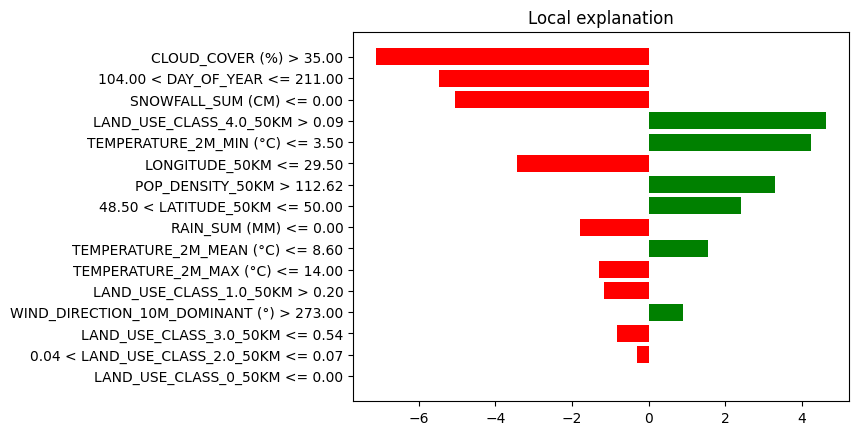

In [18]:
# Choose an instance to explain
instance_idx = 5000
instance = X_test.iloc[instance_idx]

# Get the prediction probabilities for the instance
predict_fn = lambda x: pipeline.named_steps['regressor'].predict(
    pipeline.named_steps['pca'].transform(pipeline.named_steps['scaler'].transform(x)), quantiles=[0.95]
    )

# Explain the instance
exp = explainer.explain_instance(instance, predict_fn, num_features=X_test.shape[1])

# # save to temp file
# exp.save_to_file('output_data/lime_explanation.html')

# # Show the explanation
# exp.show_in_notebook(show_table=True, show_all=True)

# Show the explanation as a plot
exp.as_pyplot_figure()
plt.show()